In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
dataset=pd.read_csv('breast-cancer-wisconsin.data')
dataset.shape

(698, 11)

In [3]:
dataset.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
dataset.columns = [['Id','clump_thickness','Uniformity_Cell_size','Uniformity_cell_shape','Marginal_adhesion','Single_e_cell_sixe','Bare_nuclei','Bland_chromatin','Normal_nucleoli','Mitoses','Class']]

In [5]:
dataset.head(10)

,Id,clump_thickness,Uniformity_Cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_sixe,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [54]:
from sklearn.model_selection import train_test_split

X = np.array(dataset.iloc[:,2:5])  
y = np.array(dataset['Class'])    

# split into train and test
X_train, \
X_test, \
y_train, \
y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [55]:
X_test.shape

(231, 3)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train.ravel())
pred = knn.predict(X_test)
print("accuracy: {}".format(accuracy_score(y_test,pred)))

accuracy: 0.9523809523809523


In [57]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train.ravel())

KNeighborsClassifier()

In [58]:
from sklearn.model_selection import cross_val_score
neighbors = list(range(1, 20, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
   knn = KNeighborsClassifier(n_neighbors=k)
   scores = cross_val_score(knn, X_train, y_train.ravel(), cv=2, scoring='accuracy')
   cv_scores.append(scores.mean())
print(cv_scores) 

[0.9207567587395914, 0.9228751696562856, 0.9421884743773156, 0.9378966288837534, 0.9379057994937823, 0.9378966288837534, 0.9357507061369722, 0.9357598767470012, 0.9357507061369722, 0.9357507061369722]


In [59]:
y_pred = classifier.predict(X_test)

In [60]:
from sklearn.ensemble import RandomForestClassifier

The optimal number of neighbors is 5


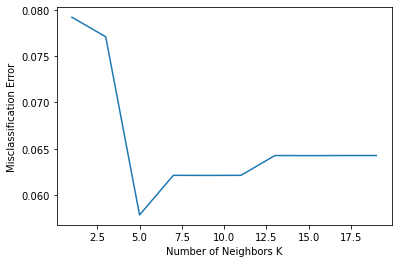

In [61]:
# changing to misclassification error
mse = [1-x for x in cv_scores]


optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       149
           4       0.92      0.96      0.94        82

    accuracy                           0.96       231
   macro avg       0.95      0.96      0.95       231
weighted avg       0.96      0.96      0.96       231

[[142   7]
 [  3  79]]


In [63]:
#Normalizing
sc = StandardScaler()
X_normalized = sc.fit_transform(X)
#Apply PCA 
pca = PCA(n_components = 2).fit(X_normalized)
pca_X = pca.transform(X_normalized)

In [64]:
pca_X.shape
(569, 2)

(569, 2)

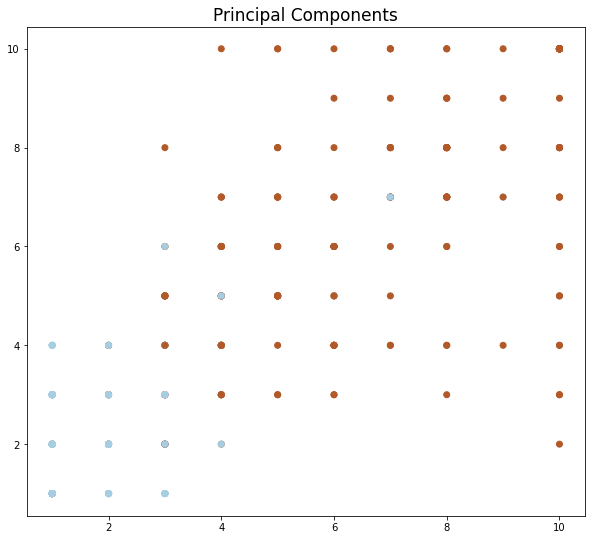

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,9))
plt.title("Principal Components", fontsize=17)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, random_state=2)
clf = RandomForestClassifier(n_estimators=100, max_depth=4)
clf.fit(X_train, y_train.ravel())
print("Accuracy on training set {}".format(clf.score(X_train, y_train)))
y_pred = clf.predict(X_test)
print("Accuracy on test set {}".format(accuracy_score(y_test, y_pred)))

Accuracy on training set 0.9617590822179732
Accuracy on test set 0.9314285714285714
